In [78]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [79]:
import numpy as np
import pandas as pd

In [80]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [81]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [82]:
engine = create_engine("sqlite:///data/hawaii.sqlite")

In [83]:
# reflect an existing database into a new model using automap_base()

Base = automap_base()

# reflect the tables with Base.prepare(), passing in the engine and reflect=True
Base.prepare(engine, reflect=True)


In [84]:
# We can view all of the classes that automap found with Base.classes
Base.classes.keys()

['measurement', 'station']

In [85]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [86]:
# Create our Session() and bind it to the engine
session = Session(bind=engine)

In [91]:
inspector = inspect(engine)
measurement_insp = inspector.get_columns('measurement')
pd.DataFrame(measurement_insp)

,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0


# Exploratory Climate Analysis

##### Design a query to retrieve the last 12 months of precipitation data

In [92]:
# Calculate the date 1 year ago from the last data point in the database
# Use the datetime.timedelta() function to help calculating the difference of one year, 12 months, or 365 days
last_date = (session
    .query(Measurement.date)
    .order_by(Measurement.date.desc())
    .first().date)
last_date 

'2017-08-23'

In [93]:
# Use the datetime.timedelta() function to help calculating the difference of one year, 12 months, or 365 days
One_Year_ago = dt.datetime.strptime(last_date, '%Y-%m-%d') -dt.timedelta(days=365)
One_Year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [94]:
# Use session.query() to retrieve the date and prcp columns, .filter() by the date you calculated above, and selecting .all() results

rain_past_year = (session
    .query(Measurement.date, func.avg(Measurement.prcp))
    .filter(Measurement.date >= One_Year_ago)
    .group_by(Measurement.date).all())
rain_past_year

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [95]:
# Save the query results as a Pandas DataFrame() and set the index to the date column
rain_past_year_df = pd.DataFrame(rain_past_year[:10], columns=['Date', 'Precipitation'])
rain_past_year_df.set_index('Date', inplace=True, )
rain_past_year_df

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
2016-08-29,0.243333
2016-08-30,0.011667
2016-08-31,0.636000
2016-09-01,0.006000


In [96]:
# Sort the dataframe by date
rain_past_year_df = rain_past_year_df.sort_values(by='Date', ascending=True)
rain_past_year_df


#Use Pandas Plotting with Matplotlib to plot the data
#rain_past_year_df.plot(rot=90)
#plt.xlabel("Date")
#plt.ylabel("Inches")


,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
2016-08-29,0.243333
2016-08-30,0.011667
2016-08-31,0.636000
2016-09-01,0.006000


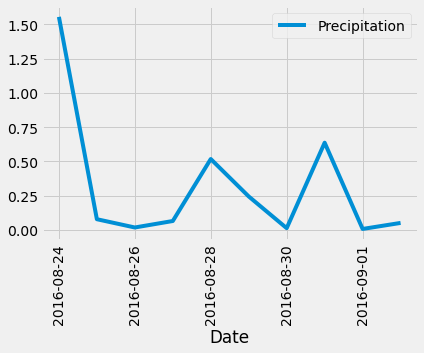

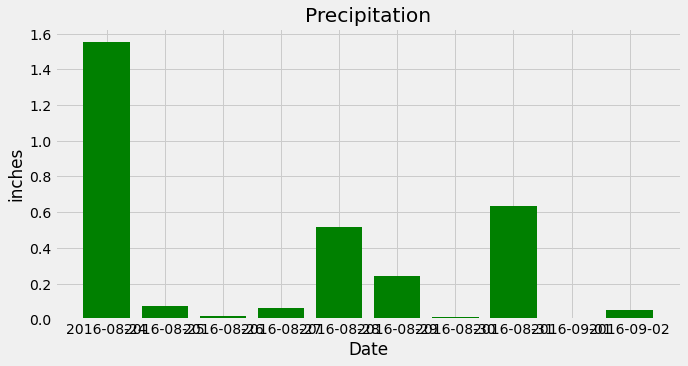

In [74]:
rain_past_year_df.plot(rot=90)
plt.figure(figsize=(10,5))
plt.bar(rain_past_year_df.index, rain_past_year_df['Precipitation'],color='green')
plt.title("Precipitation")
plt.ylabel("inches")
plt.xlabel("Date")
plt.savefig("Images/Precipitation.png")
plt.show()

In [97]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_past_year_df.describe()

,Precipitation
count,10.000000
mean,0.317648
std,0.489066
min,0.006000
25%,0.025000
50%,0.070571
75%,0.448333
max,1.555000


##### Design a query to show how many stations are available in this dataset


In [104]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order. Hint: session.query() the station column in the Station table
(session
    .query(measurement.station, station.name)
    .join(station, measurement.station == Station.station)
    .all())
    



NameError: name 'measurement' is not defined

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station
(session
.query(measurement.station,
      func.min(measurement.tobs),
      func.max(measurement.tobs),
      func.avg(measurement.tobs),
.filter(measurement.station =='USC00519281')

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

(session
  .queery(measurement.station, func.count(measurement.tobs))
  .groupby(measurement.station)
  .order_by(func.count(measurement.tobs)desc())

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return (session.query(func.min(Measurement.tobs), 
                         func.avg(Measurement.tobs), 
                         func.max(Measurement.tobs))
                    .filter(Measurement.date >= start_date)
                    .filter(Measurement.date <= end_date)
                    .all())

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    return (session.query(func.min(Measurement.tobs), 
                          func.avg(Measurement.tobs), 
                          func.max(Measurement.tobs))
                   .filter(func.strftime("%m-%d", Measurement.date) == date)
                   .all())
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
